In [6]:
# 2024-11-30 02:20:10 INFO roadwork/001_-_Scrambling_Eggs.wav|268.76637029647827
import os
from mutagen.wave import WAVE

ROOT = os.getcwd()

def getFiles(dir):
    dirs = [(os.path.join(dir, subdir), subdir) for subdir in os.listdir(dir)]

    files = [
        (os.path.join(subdir, file), dir, file)
        for subdir, dir in dirs
        for file in os.listdir(subdir)
    ]
    return sorted(files)

audioDir = os.path.join(ROOT, 'audio')

files = getFiles(audioDir)

def getLog(file):
    lines = open(file).read().splitlines()
    logs = [
        line.split(' ')[3].split('|')
        for line in lines
        if "Retrying" not in line
    ]
    withPath = [
        (os.path.join(ROOT, 'audio', filepath), float(exec_time))
        for filepath, exec_time in logs
    ]
    withSize = [
        (exec_time, os.path.getsize(filepath), filepath)
        for filepath, exec_time in withPath
    ]
    return sorted(withSize, reverse=True)

def getDuration(filepath):
    audio = WAVE(filepath)
    audio_info = audio.info
    duration = int(audio_info.length)
    return duration

logs = getLog('logs.txt')

sizes = [
    size>>20
    for exec_time, size, filepath in logs
]
execution_time = [
     exec_time
    for exec_time, size, filepath in logs
]

duration = [
    getDuration(filepath)
    for exec_time, size, filepath in logs
]

len(logs)

388

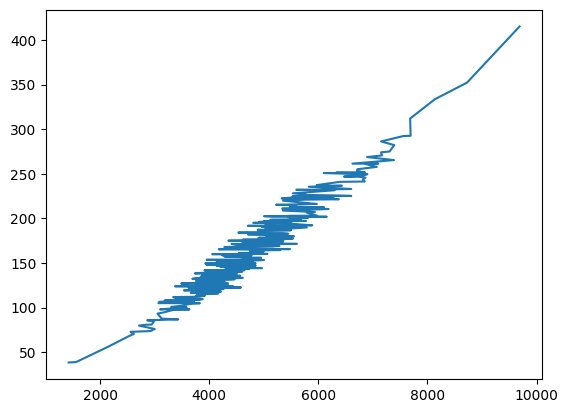

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(duration)
y = np.array(execution_time)

plt.plot(x,y)
plt.show()

In [76]:
failsChunking = list(set([
    line.split(' ')[3].split('|')[0]
    for line in open('logs.txt').read().splitlines()
    if "Retrying" in line
    ]))

failsChunking

['roadwork/145_-_A_Substantial_Box.wav',
 'rotl/013_-_Then_There_Was_Pump_Chili.wav']